# Audio Classifier

Speech Emotion Recognition (SER) is one of the most challenging tasks in speech signal analysis domain, it is a research area problem which tries to infer the emotion from the speech signals.

This is my first step towards audio classification. 
I've currently only classified it into two groups - Neutral and Angry.
The Dataset consists of my own voice recordings - 60 Neutral recordings and 50 Angry recordings - each of approx. 3 seconds.


I have used CNN classifier for training the dataset.

A convolutional neural network (CNN) is a class of deep neural networks, most commonly applied to analyzing visual imagery.
CNNs have proven very effective in image classification and have shown promise for audio classification. 

# Data Processing

Firstly, import the libraries you will need.

In [4]:
import numpy as np
import pandas as pd
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
import keras
import pickle #To store our model

Using TensorFlow backend.


Then, load the audio data. 

I have two folders- one labeled neutral containing neutral audio files and another folder containing angry containing angry audio files.

In [5]:
import os
path = 'Audio_data/'
neutral= os.listdir(path+'neutral')
angry= os.listdir(path+'angry')

In [6]:
print(len(neutral))
print(len(angry))

60
50


In [7]:
angry[40]

'Recording (47).wav'

Store the labels of the files in an array.

In [8]:
emotions=[]
for item in neutral:
    emotions.append("neutral")
for item in angry:
    emotions.append("angry")

In [9]:
labels = pd.DataFrame(emotions, columns=[-1])
labels[55:65]

,-1
55,neutral
56,neutral
57,neutral
58,neutral
59,neutral
60,angry
61,angry
62,angry
63,angry
64,angry


Store both the neutral and angry files in one list.

In [10]:
llist= neutral + angry
llist[55:65]

['56Label.wav',
 '57Label.wav',
 '58Label.wav',
 '59Label.wav',
 '60Label.wav',
 'Recording (10).wav',
 'Recording (11).wav',
 'Recording (12).wav',
 'Recording (13).wav',
 'Recording (14).wav']

Load audio file from both neutral and angry samples, and observe the difference in amplitude between the two.

In [11]:
def load_audio_file(file_path):
    data = librosa.core.load(file_path)[0] #, sr=16000
    return data

def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

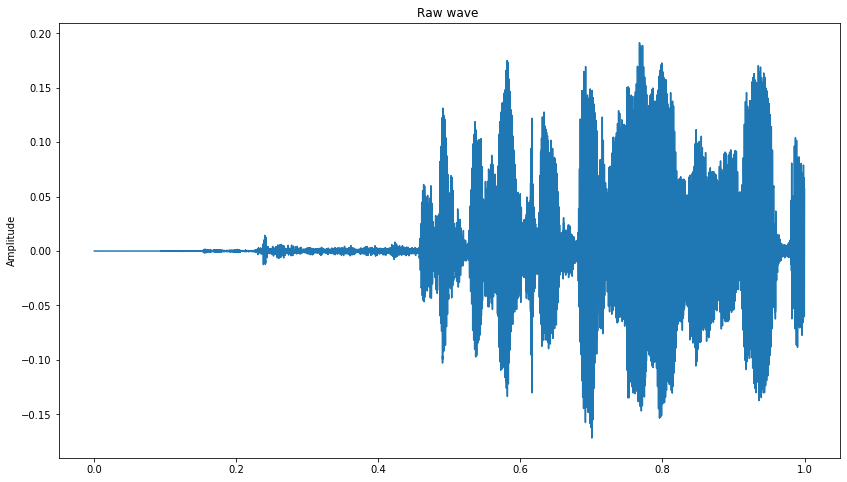

In [12]:
neutral_data = load_audio_file(path+"neutral/01Label.wav")
plot_time_series(neutral_data)

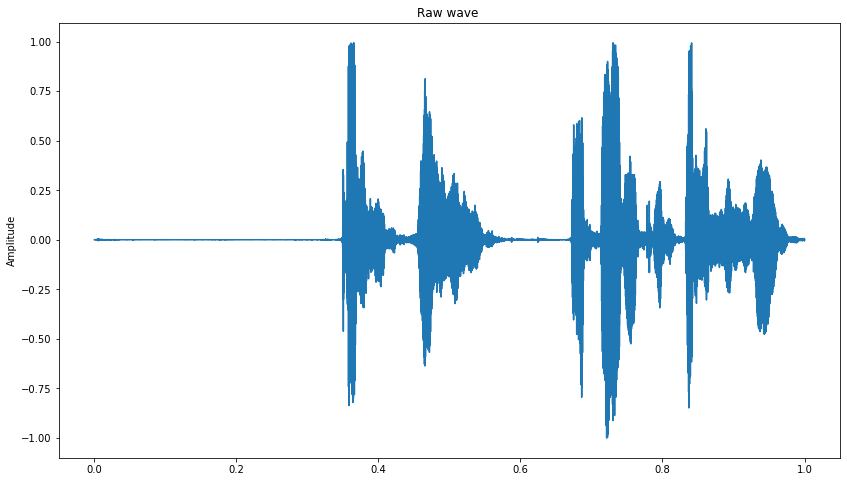

In [13]:
angry_data = load_audio_file(path+"angry/Recording (2).wav")
plot_time_series(angry_data)

# Featurization

Before going into pre-processing and data exploration we will explain some of the concepts that allowed us to select our features.

1. Mel scale — deals with human perception of frequency, it is a scale of pitches judged by listeners to be equal distance from each other.

2. Pitch — how high or low a sound is. It depends on frequency, higher pitch is high frequency.

3. Frequency — speed of vibration of sound, measures wave cycles per second.

4. Chroma — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

5. Fourier Transforms — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. 

Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

Using the signal extracted from the raw audio file and several of librosa’s audio processing functions, MFCCs were extracted using the following function:

In [14]:
df = pd.DataFrame(columns=['feature'])
i=0
for index,y in enumerate(llist):
    
    #result=np.array([])
    if index<60:
        x, sample_rate = librosa.load(path+"neutral/"+y)
        mfccs=np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)
    else:
        x, sample_rate = librosa.load(path+"angry/"+y)
        mfccs=np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)
    #result=np.hstack((result, mfccs))
    
    feature = mfccs
    df.loc[i] = [feature]
    
    i=i+1

In [15]:
df[:5]

,feature
0,"[-448.93594, 101.5942, -13.21898, 24.87083, -1..."
1,"[-357.2153, 138.05338, -23.15337, 25.440516, -..."
2,"[-418.35165, 125.59138, -17.544325, 38.646175,..."
3,"[-373.03137, 128.58855, -16.243088, 36.37658, ..."
4,"[-383.41455, 137.28395, -17.908083, 32.095284,..."


In [16]:
df2 = pd.DataFrame(df['feature'].values.tolist())
df2[:5]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-448.935944,101.594200,-13.218980,24.870831,-10.412931,0.958163,-8.289434,-15.632518,-9.739482,-11.989474,...,6.072610,7.539416,3.254144,0.655576,-2.814597,-4.747623,-4.080068,-4.052931,-0.600274,0.719789
1,-357.215302,138.053375,-23.153370,25.440516,-11.194603,-1.034646,-2.831885,-20.411125,-13.683929,-16.207031,...,8.385799,11.160159,5.188492,4.785748,0.591885,-1.896215,0.699012,-2.337236,0.056494,1.191084
2,-418.351654,125.591377,-17.544325,38.646175,-4.480252,7.928045,-5.057821,-10.532663,-11.119750,-13.482015,...,2.213417,5.850023,6.457126,7.673837,1.465527,-2.682783,-1.291325,-1.296513,1.464910,3.240514
3,-373.031372,128.588547,-16.243088,36.376579,-16.060345,1.545921,-2.343774,-23.328745,-12.751724,-18.113068,...,7.594358,7.235886,1.880138,1.412255,-2.701203,-3.151090,0.672947,-2.699697,-0.530529,0.365696
4,-383.414551,137.283951,-17.908083,32.095284,-13.711784,1.742263,-6.980337,-13.876153,-12.353194,-13.632580,...,4.443307,8.645863,9.857705,9.512180,3.130873,-0.739501,-0.667346,-2.512430,-0.413006,1.577377


In [17]:
#df2 = pd.concat([df,labels], axis=1)
df2["label"] = emotions

In [18]:
df2[55:65]
#len(df2)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
55,-399.628601,137.101013,-5.588921,45.474609,-16.144604,11.538224,-10.503644,-11.006195,-15.982257,-9.835282,...,1.230685,6.449435,3.998499,3.095498,0.179710,1.524628,-1.672052,-2.958056,-1.030537,neutral
56,-408.381836,139.790924,-19.900515,39.882248,-9.796869,5.090791,-7.661403,-15.835160,-20.447500,-4.812745,...,0.045030,5.849525,5.625018,6.652701,5.264266,3.291679,-2.010066,-2.391327,-1.331069,neutral
57,-444.347748,155.122025,-12.306865,18.935593,-7.611145,5.635805,-5.130061,-19.659857,-18.904240,-9.102822,...,3.804492,8.464513,5.584928,2.973674,3.324432,0.175895,-0.419321,0.788151,-1.256381,neutral
58,-397.089172,147.094620,-9.171462,26.084063,-13.461006,-5.617195,-5.460781,-19.529018,-20.302889,-5.797530,...,-0.469785,4.101226,2.999230,2.025349,3.229267,3.440537,1.288544,0.415090,-3.604806,neutral
59,-397.893707,134.210281,-14.386139,30.589518,-3.577070,-0.783316,-11.494068,-22.579214,-20.588585,-11.359775,...,2.145973,6.343333,5.934462,4.258216,3.054111,2.245669,-0.185008,-0.305183,-1.933122,neutral
60,-327.584106,60.814465,-36.724922,19.577461,-20.739429,-5.700117,-11.761322,-12.779781,-9.713307,-13.175269,...,1.527775,2.157958,-1.997512,-1.794668,-0.446171,0.869378,-0.625757,0.652685,0.456708,angry
61,-405.187103,53.994473,-13.328820,8.773295,-18.180574,-6.109019,1.544408,-7.574718,-4.948618,-7.828671,...,-0.213934,-0.558622,-1.578952,0.007562,0.141408,-0.070312,-0.477016,0.468767,-0.291225,angry
62,-365.938629,64.622620,-28.369177,15.412011,-18.403856,-6.261985,1.278824,-13.030353,-9.223037,-10.667692,...,2.256596,3.651626,-1.007913,-1.274758,-2.189985,-0.320810,0.066562,-1.545228,0.335562,angry
63,-359.678802,66.621521,-24.135773,9.375669,-24.999622,1.726865,-1.662047,-7.379592,-9.616259,-8.081337,...,0.520685,2.009341,-1.343070,-0.174348,-1.352023,-2.308319,-0.676766,-0.493999,-0.164493,angry
64,-304.199524,75.410355,-53.235817,27.234280,-22.033459,-2.482414,-2.538193,-8.594347,-7.999066,-13.476399,...,0.385996,0.537240,-3.536498,-2.588716,-3.025516,-1.086459,0.035514,0.264445,-1.324015,angry


Splitting our dataset into two samples for training and testing our model.

In [19]:
train = pd.concat([df2[:50],df2[60:100]])
test = pd.concat([df2[50:60], df2[100:]])
print("Training sample length: ",len(train))
print("Testing sample length: ",len(test))

Training sample length:  90
Testing sample length:  20


In [20]:
test[:2]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
50,-437.329102,122.634315,-2.635107,32.740711,-8.193053,-2.061402,-10.371319,-15.083408,-17.209284,-8.141034,...,-1.000758,-1.111646,-1.019742,1.392953,1.192869,2.261923,-0.558715,-2.574625,-3.094502,neutral
51,-386.637604,162.491531,-5.990347,26.227709,-6.867142,6.135802,-6.918873,-11.308727,-9.923246,-12.481630,...,-0.794147,3.097692,0.776943,-3.319222,0.365969,0.559856,-0.605945,1.194798,-1.713943,neutral


Separating out the features and labels into X_train, X_test, y_train, y_test.

And we also use LabelEncoder() function to convert our categorical labels into numbers - so, since we have only two categories - they will be converted into 0's and 1's respectively.

In [21]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X_train = np.array(train.iloc[:,:-1])
X_test = np.array(test.iloc[:,:-1])

y_train = np.array(train.iloc[:,-1:])
y_test = np.array(test.iloc[:,-1:])

le = LabelEncoder()
y_train = to_categorical(le.fit_transform(y_train)) 
y_test = to_categorical(le.fit_transform(y_test)) 

F:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
print("[+] Number of training samples:", X_train.shape[0])

print("[+] Number of testing samples:", X_test.shape[0])

print("[+] Number of features:", X_train.shape[1])

[+] Number of training samples: 90
[+] Number of testing samples: 20
[+] Number of features: 40


In [23]:
y_train.shape[1]

2

# Model Training

Now, we will construct a Multilayer Perceptron (MLP) Neural Network using Keras and a Tensorflow backend.

We start with a sequential model so we can build the model layer by layer.

We will begin with a simple model architecture, consisting of three layers - an input layer, a hidden layer and an output layer. All three layers will be of the dense layer type which is a standard layer type that is used in many cases for neural networks.

The first layer will receive the input shape. As each sample contains 40 MFCCs (or columns) we have a shape of (1x40) this means we will start with an input shape of 40.

The first two layers will have 256 nodes. The activation function we will be using for our first 2 layers is the ReLU, or Rectified Linear Activation. This activation function has been proven to work well in neural networks.

We will also apply a Dropout value of 50% on our first two layers. This will randomly exclude nodes from each update cycle which in turn results in a network that is capable of better generalisation and is less likely to overfit the training data.

Our output layer will have 2 nodes (num_labels) which matches the number of possible classifications. The activation is for our output layer is softmax. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn import metrics 

In [25]:
num_labels = y_train.shape[1]
filter_size = 2

model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

For compiling our model, we will use the following three parameters:

1. Loss function - we will use categorical_crossentropy. This is the most common choice for classification. A lower score indicates that the model is performing better.

2. Metrics - we will use the accuracy metric which will allow us to view the accuracy score on the validation data when we train the model.

3. Optimizer - here we will use adam which is a generally good optimizer for many use cases.

In [26]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [27]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

Now, we will train the model.

We will start with 100 epochs which is the number of times the model will cycle through the data. The model will improve on each cycle until it reaches a certain point.

We will also start with a low batch size, as having a large batch size can reduce the generalisation ability of the model.

In [28]:
from datetime import datetime 

num_epochs = 100
num_batch_size = 32
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test))


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 90 samples, validate on 20 samples
Epoch 1/100
90/90 [==============================] - 0s 2ms/step - loss: 20.7437 - accuracy: 0.5111 - val_loss: 13.2353 - val_accuracy: 0.5000
Epoch 2/100
90/90 [==============================] - 0s 155us/step - loss: 16.3295 - accuracy: 0.5889 - val_loss: 8.8916 - val_accuracy: 0.5000
Epoch 3/100
90/90 [==============================] - 0s 166us/step - loss: 12.0621 - accuracy: 0.6333 - val_loss: 0.9102 - val_accuracy: 0.7000
Epoch 4/100
90/90 [==============================] - 0s 144us/step - loss: 11.9463 - accuracy: 0.5778 - val_loss: 0.0492 - val_accuracy: 0.9500
Epoch 5/100
90/90 [==============================] - 0s 188us/step - loss: 9.5889 - accuracy: 0.6222 - val_loss: 1.9113 - val_accuracy: 0.7000
Epoch 6/100
90/90 [==============================] - 0s 188us/step - loss: 6.2960 - accuracy: 0.7000 - val_loss: 1.6323 - val_accuracy: 0.7500
Epoch 7/100
90/90 [==============================] - 0s 199us/step - loss: 8.6739 - accuracy: 0

90/90 [==============================] - 0s 155us/step - loss: 0.3255 - accuracy: 0.9556 - val_loss: 1.0879e-04 - val_accuracy: 1.0000
Epoch 58/100
90/90 [==============================] - 0s 144us/step - loss: 0.3826 - accuracy: 0.9889 - val_loss: 7.6164e-05 - val_accuracy: 1.0000
Epoch 59/100
90/90 [==============================] - 0s 144us/step - loss: 0.1900 - accuracy: 0.9889 - val_loss: 5.9599e-05 - val_accuracy: 1.0000
Epoch 60/100
90/90 [==============================] - 0s 166us/step - loss: 0.3265 - accuracy: 0.9778 - val_loss: 7.3921e-05 - val_accuracy: 1.0000
Epoch 61/100
90/90 [==============================] - 0s 155us/step - loss: 8.1239e-04 - accuracy: 1.0000 - val_loss: 6.4904e-04 - val_accuracy: 1.0000
Epoch 62/100
90/90 [==============================] - 0s 177us/step - loss: 7.1852e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 63/100
90/90 [==============================] - 0s 177us/step - loss: 0.0717 - accuracy: 0.9889 - val_loss: 0.0037 

In [29]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  1.0
Testing Accuracy:  1.0


We will store our model in a pickle file, so we don't have to keep training it again and again while testing.

In [30]:
if not os.path.isdir("result"):
    os.mkdir("result")

pickle.dump(model, open("result/mlp_classifier.model", "wb"))

In [31]:
modelfile = 'result/mlp_classifier.model'
model = pickle.load(open(modelfile, 'rb'))

# Testing

In [32]:
def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

In [33]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [34]:
filename = path+'test/angry_1.wav' 
print_prediction(filename)

The predicted class is: angry 

angry 		 :  1.00000000000000000000000000000000
neutral 		 :  0.00000000000111037708975386673060


In [36]:
filename = path+'test/neutral_1.wav' 
print_prediction(filename)

The predicted class is: neutral 

angry 		 :  0.00000000000000000374090198639453
neutral 		 :  1.00000000000000000000000000000000


As we can see, our test audio samples have been successfully classified into neutral and angry.